# AI - Project 0 - Mohsen Fayyaz - 810196650

## a)
Data is being read and cleaned by removing non numeric columns and filling NaNs with corresponding column mean.
Then 9 plots for each column of data(properties) are being drawn, relative to the houses "SalePrice".

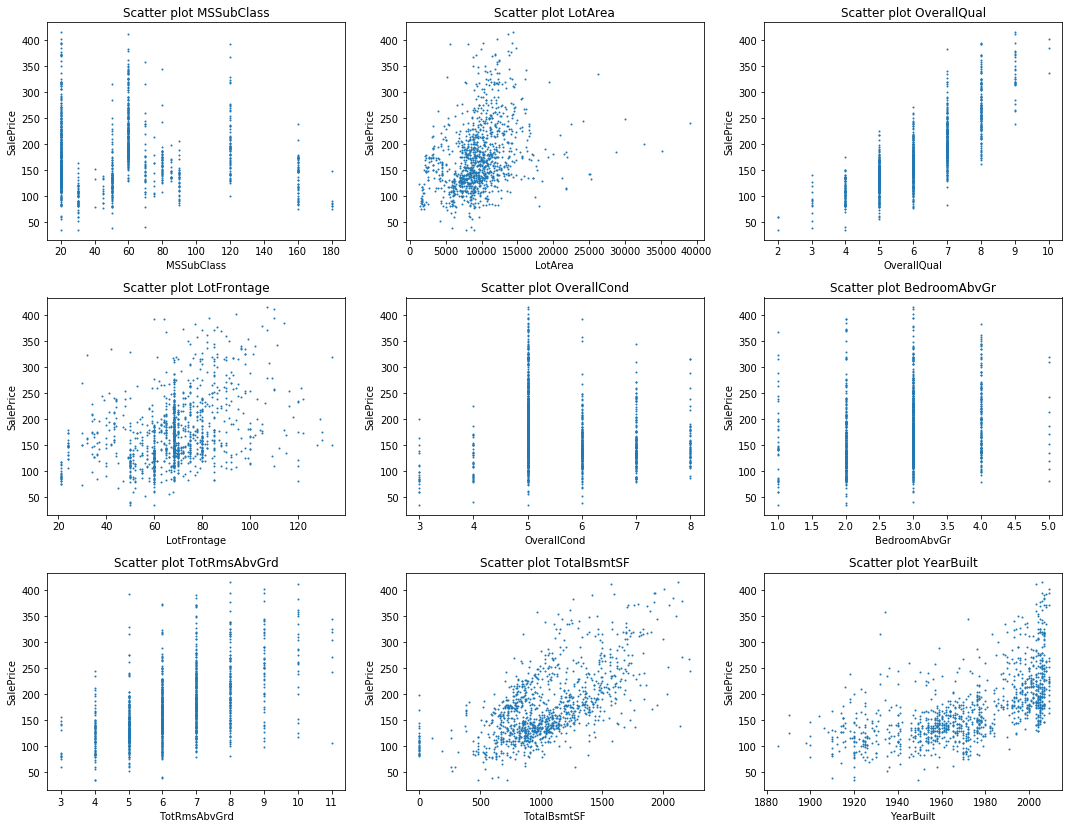

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SALE_PRICE_COL = "SalePrice"
ID_COL = "Id"

houses_data_frame = pd.read_csv("houses.csv")
# print(houses_data_frame.head(1).to_string())
houses_numeric = houses_data_frame.select_dtypes([np.number])  # Delete non numeric columns
# print(houses_numeric.to_string())
houses_filled_NaN = houses_numeric.fillna(houses_numeric.mean())  # Fill NaNs with column mean
# print(houses_filled_NaN.to_string())
final_houses = houses_filled_NaN

        
counter = 0
def draw_plot(column):
    global counter
    if column.name != SALE_PRICE_COL and column.name != ID_COL:
        counter += 1
        plt.subplot(4, 3, counter)
        plt.scatter(final_houses[column.name], final_houses[SALE_PRICE_COL], s=1)
        plt.title('Scatter plot ' + column.name)
        plt.xlabel(column.name)
        plt.ylabel(SALE_PRICE_COL)
    

plt.figure(figsize=(15, 15))
final_houses.apply(draw_plot, axis=0)

plt.tight_layout()        
plt.show()


## b)

As shown above <b>OverallQual</b> and <b>SalePrice</b> has a linear relationship
So the linear estimation of the data distribution is calculated below.
Then RMSE of the data is being calculated as written in the project.

<table style="width: 100%">
    <tr>
        <td>
            <img src="http://mohsenfayyaz.ir/extra/files/line.png" alt="line.png" style="width: 100%;"/> -->
        </td>
        <td>
            $$ \huge \hat{y} = wx + b $$ <br>
            $$ w = \frac{\Delta{y}}{\Delta{x}} = \frac{200-(-50)}{6.5-0} = 38.4615 $$ <br>
            $$ b = -50 $$ <br>
            <b> $$ \huge \hat{y} = 38.4615 \times x -50 $$ </b>
        </td>
    </tr>
</table>

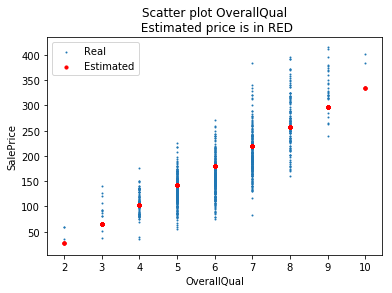

RMSE = 39.592014051273566


In [17]:
OVERALL_QUAL_COL = "OverallQual"


def calc_linear_estimation(x):
    return 38.4615 * x - 50


def calc_RMSE(y_hat, y):
    return np.sqrt(1 / len(y) * np.sum(np.power(y_hat - y, 2)))


plt.scatter(final_houses[OVERALL_QUAL_COL], final_houses[SALE_PRICE_COL], s=1, label="Real")
plt.scatter(final_houses[OVERALL_QUAL_COL], calc_linear_estimation(final_houses[OVERALL_QUAL_COL]), s=10, color="red", label="Estimated")
plt.title('Scatter plot ' + OVERALL_QUAL_COL + "\n Estimated price is in RED")
plt.xlabel(OVERALL_QUAL_COL)
plt.ylabel(SALE_PRICE_COL)
plt.legend(loc="upper left")
plt.show()

print("RMSE = ", end='')
print(calc_RMSE(calc_linear_estimation(final_houses[OVERALL_QUAL_COL]), final_houses[SALE_PRICE_COL]))


As shown above the RMSE calculated for the estimated line is 39.59 and it's less than 90 which was recommended in the project.
The plot of this estimation and the real data is drawn above as well.

## c) -> vectorization_completed.ipynb
## Exercise


In [18]:
import time
import numpy as np

N = 1000000
a = np.random.rand(N)
b = np.random.rand(N)
v = np.random.rand(10)
u = np.empty(10)

# non-vectorized implementation:
for i in range(10):
    u[i] = v[i] ** 2
print('non-vectorized:', u)

# vectorized implementation:
# WRITE YOUR CODE HERE
u = np.power(v, 2)

print('vectorized:', u)

non-vectorized: [0.1421729  0.00316897 0.00305788 0.33789703 0.82368052 0.48082922
 0.10321612 0.42970683 0.81073099 0.71221875]
vectorized: [0.1421729  0.00316897 0.00305788 0.33789703 0.82368052 0.48082922
 0.10321612 0.42970683 0.81073099 0.71221875]


In [19]:
v = np.random.rand(10)

# non-vectorized implementation:
u = float('-inf')
for i in range(10):
    if v[i] > u:
        u  = v[i]
print('non-vectorized:', u)



# vectorized implementation:
# WRITE YOUR CODE HERE
u = np.max(v)

print('vectorized:', u)

non-vectorized: 0.921501251561196
vectorized: 0.921501251561196


In [20]:
a = np.random.rand(10)
b = np.random.rand(10)

# non-vectorized implementation:
u = 0
for i in range(10):
    u += abs(a[i] - b[i])
u /= N
print('non-vectorized:', u)
        
# vectorized implementation:
# WRITE YOUR CODE HERE
u = np.sum(np.abs(a-b)) / N

print('vectorized:', u)

non-vectorized: 3.516825628266531e-06
vectorized: 3.516825628266531e-06


## e)
Here the euclidean_distances between the input and data properties are being calculated to obtain the 10 nearest neighbors of the input in the dataset.<br>
After acquiring nearest neighbors, their mean in "SalePrice" is being returned as the estimated "SalePrice" for the input data.<br>
The method we are said to use for Feature Scaling is Min-Max Scaling.<br>
This method shoud be applied to dataset and input seperatly, not combined, to prevent the input from influencing on the dataset. So there are two different methods to do as explained.<br>
For the input data we should scale it by using training data parameters.<br>
The reason is that we want to pretend that the test data is “new, unseen data.”<br>

scaled_train =  (train - train_min) / train_peek_to_peek

scaled_test = (test - train_min) / train_peek_to_peek

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SALE_PRICE_COL = "SalePrice"
ID_COL = "Id"

houses_data_frame = pd.read_csv("houses.csv")
houses_numeric = houses_data_frame.select_dtypes([np.number])  # Delete non numeric columns
houses_filled_NaN = houses_numeric.fillna(houses_numeric.mean())  # Fill NaNs with column mean
final_houses = houses_filled_NaN

def KNN(input_data, k=10):
    def standardize_dataset(x):
        # along axis 0 (i.e. rows -> y). This gives you a vector of size (ncols,)
        x_normed = np.divide((np.subtract(x, np.min(x, axis=0))), np.subtract(np.max(x, axis=0), np.min(x, axis=0)))
        return x_normed
    def standardize_input(x, datset):
        x_normed = np.divide((np.subtract(x, np.min(datset, axis=0))), np.subtract(np.max(datset, axis=0), np.min(datset, axis=0)))
        return x_normed

    houses_with_price = final_houses
    houses_like_input = houses_filled_NaN.drop(['Id', 'SalePrice'], axis=1)

    standard_input_data = standardize_input(input_data, houses_like_input)
    standard_houses = standardize_dataset(houses_like_input)

    euclidean_distance = np.sqrt(np.sum(np.power(np.subtract(standard_houses, standard_input_data), 2), axis=1))
    k_nearest_neighbors_distance = euclidean_distance.nsmallest(k)
    k_nearest_houses = houses_with_price.iloc[k_nearest_neighbors_distance.head(10).index]
    
    return np.mean(k_nearest_houses[SALE_PRICE_COL])



Done      

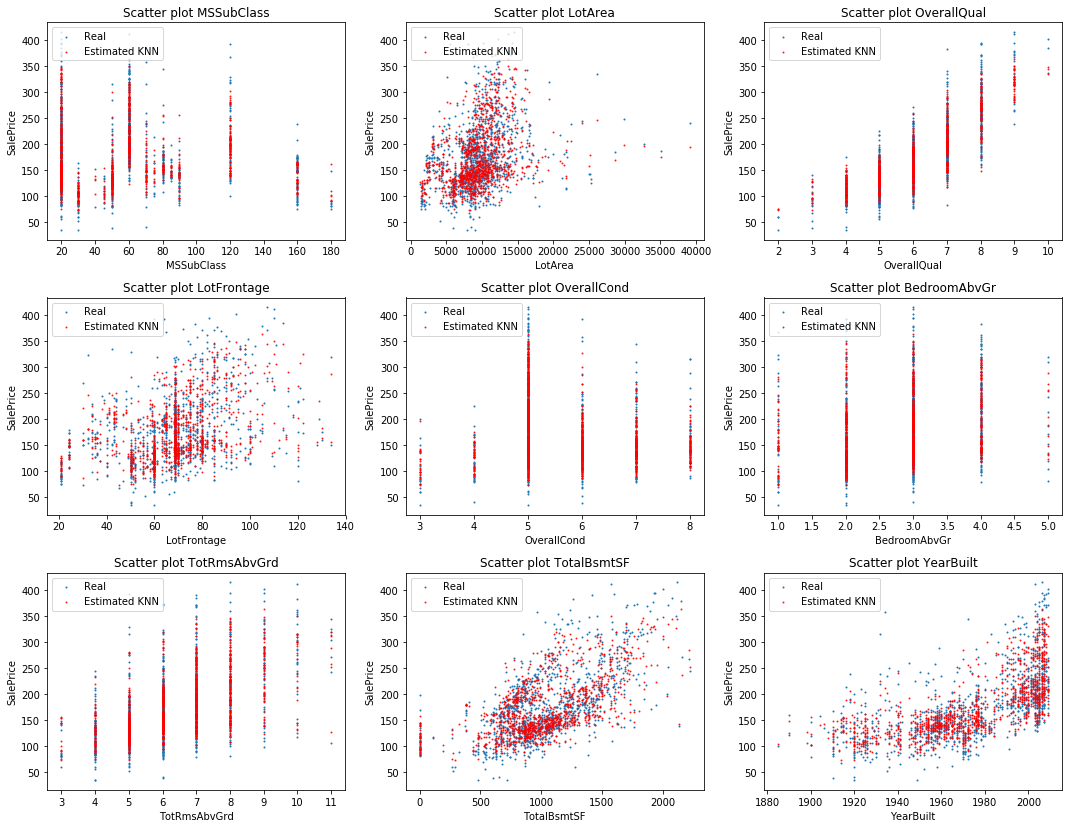

In [22]:
print('\rLoading...', end='')
KNN_list = final_houses.drop(['Id', 'SalePrice'], axis=1).apply(KNN, axis=1)
print('\rDone      ', end='')

counter = 0
def draw_plot(column):
    global counter
    if column.name != SALE_PRICE_COL and column.name != ID_COL:
        counter += 1
        plt.subplot(4, 3, counter)
        plt.scatter(final_houses[column.name], final_houses[SALE_PRICE_COL], s=1, label="Real")
        plt.scatter(final_houses[column.name], KNN_list, s=1, label="Estimated KNN", color="red", alpha="0.8")
        plt.title('Scatter plot ' + column.name)
        plt.xlabel(column.name)
        plt.ylabel(SALE_PRICE_COL)
        plt.legend(loc="upper left")
    

plt.figure(figsize=(15, 15))
final_houses.apply(draw_plot, axis=0)

plt.tight_layout()
plt.show()

As shown above estimated sale prices by KNN are not so different from the real values.
<br>
TA Example:

In [23]:
columns = ['MSSubClass', 'LotArea', 'OverallQual', 'LotFrontage', 'OverallCond', 
           'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']
row_data = [70,11435,8,67.66037735849056,7,3,7,792,1929]

singular_df = pd.DataFrame(data = [row_data], columns = columns)
print(KNN(singular_df))

173.51
